In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [4]:
def metrics(y, x):
    print(f'Accuracy: {accuracy_score(y, x)}')
    print(f'Precision: {precision_score(y, x)}')
    print(f'Recall: {recall_score(y, x)}')
    print(f'F1 Score: {f1_score(y, x)}')
    print(f'ROC AUC: {roc_auc_score(y, x)}')

In [5]:
df = pd.read_csv(r"C:\Users\trush\OneDrive\Documents\WFU Grad School Info\BAN 6025 Machine Learning\Sky's the Limit\BAN6025Project2Data.csv")
df.head()

,Target_Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200,0,INTERNET,3.743048,other,0,1,0,0


Dummy Variables

In [6]:
df = pd.get_dummies(df, columns=['X8', 'X18', 'X15', 'X25', 'X27'], drop_first=True, dtype=float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 48 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Target_Y       1000000 non-null  int64  
 1   X1             1000000 non-null  float64
 2   X2             1000000 non-null  float64
 3   X3             1000000 non-null  int64  
 4   X4             1000000 non-null  int64  
 5   X5             1000000 non-null  int64  
 6   X6             1000000 non-null  float64
 7   X7             1000000 non-null  float64
 8   X9             1000000 non-null  int64  
 9   X10            1000000 non-null  float64
 10  X11            1000000 non-null  float64
 11  X12            1000000 non-null  float64
 12  X13            1000000 non-null  int64  
 13  X14            1000000 non-null  int64  
 14  X16            1000000 non-null  int64  
 15  X17            1000000 non-null  int64  
 16  X19            1000000 non-null  int64  
 17  X20      

Random Sample

In [7]:
sample_size = 0.05

sample_df = df.groupby('Target_Y', group_keys=False).apply(lambda x: x.sample(frac=sample_size, random_state=69))

sample_df.head()

C:\Users\trush\AppData\Local\Temp\ipykernel_27620\4115993255.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_df = df.groupby('Target_Y', group_keys=False).apply(lambda x: x.sample(frac=sample_size, random_state=69))


,Target_Y,X1,X2,X3,X4,X5,X6,X7,X9,X10,...,X15_CC,X15_CD,X15_CE,X15_CF,X15_CG,X25_TELEAPP,X27_macintosh,X27_other,X27_windows,X27_x11
434757,0,0.1,0.305352,-1,116,40,0.019318,-1.187689,3447,11124.876879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
334757,0,0.2,0.998933,29,5,20,17.990344,-1.101194,4507,11228.317603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
895206,0,0.6,0.249452,31,16,40,0.010178,9.409894,1291,5087.989767,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
723405,0,0.3,0.142540,-1,118,40,0.007960,49.521697,2353,4698.312868,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
133474,0,0.4,0.397762,-1,75,40,0.008105,27.252734,846,10738.552406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
sample_df['Target_Y'].value_counts()

Target_Y
0    49449
1      551
Name: count, dtype: int64

In [9]:
X = sample_df.drop(columns=['Target_Y'])
y = sample_df['Target_Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=69)

smote = SMOTE(sampling_strategy='auto', random_state=69)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Random Forest

In [10]:
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [11]:
rf_train_pred = rf.predict(X_train)

rf_test_pred = rf.predict(X_test)

print('---Train---')
metrics(y_train, rf_train_pred)

print('---Test---')
metrics(y_test, rf_test_pred)

---Train---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0
---Test---
Accuracy: 0.9878666666666667
Precision: 0.2926829268292683
Recall: 0.07272727272727272
F1 Score: 0.11650485436893204
ROC AUC: 0.535386218096026


In [16]:
chosen_columns = ['X5',
 'X28',
 'X23',
 'X27_windows',
 'X22',
 'X19',
 'X2',
 'X1',
 'X8_AC',
 'X18_BC',
 'X18_BB',
 'X18_BE',
 'X18_BD',
 'X29',
 'X17',
 'X3',
 'X16',
 'X15_CB',
 'X21',
 'X24',
 'X14',
 'X7',
 'X9',
 'X27_macintosh',
 'X15_CC',
 'X18_BF',
 'X27_other',
 'X31',
 'X25_TELEAPP',
 'X15_CD',
 'X15_CF',
 'X20',
 'X6',
 'X4',
 'X13',
 'X15_CE',
 'X18_BG',
 'X27_x11']
print(len(chosen_columns))

38


In [14]:
X_selected = X[chosen_columns]

# Split into train and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_selected, y, test_size=0.30, random_state=69, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=69)

# Apply SMOTE to balance the training set
smote = SMOTE(sampling_strategy='auto', random_state=69)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Convert resampled training data back to DataFrame
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_selected.columns)

In [15]:
model = Sequential()
model.add(Dense(19, activation='sigmoid', input_shape=(X_train_resampled.shape[1],)))  # Matches feature count
model.add(Dense(1, activation='sigmoid'))  # No need for input_shape

# Compile model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using resampled training data
model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=64, verbose=1, validation_data=(X_val, y_val), class_weight=class_weights_dict)

c:\Users\trush\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4973 - loss: 3.4491 - val_accuracy: 0.0124 - val_loss: 4.1889
Epoch 2/100
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5029 - loss: 1.3587 - val_accuracy: 0.0124 - val_loss: 4.2018
Epoch 3/100
1067/1082 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4971 - loss: 1.3331

KeyboardInterrupt: 

In [ ]:
y_pred_probs_train = model.predict(X_train_resampled)
y_pred_train = (y_pred_probs_train > 0.99).astype(int)

y_pred_probs_test = model.predict(X_test)
y_pred_test = (y_pred_probs_test > 0.99).astype(int)

In [ ]:
print('---Train---')
metrics(y_train_resampled, y_pred_train)

print('---Test---')
metrics(y_test, y_pred_test)

In [ ]:
print(confusion_matrix(y_test, y_pred_test))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


c:\Users\trush\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_47', 'keras_tensor_48']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Step: 0, Discriminator Loss: 0.7043203115463257, Generator Loss: 0.7417747974395752
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 

c:\Users\trush\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_47', 'keras_tensor_48']. Received: the structure of inputs=('*', '*')
  warnings.warn(


              1         2         3         4         5         6         7  \
0      0.289710  0.585707 -0.513394  0.733109  0.046937  0.292929  0.354206   
1      0.828099  0.587764  0.580559 -0.327636 -0.708574  0.678035 -0.526864   
2      0.787813  0.865004  2.014528 -0.615867 -0.785806 -0.129859 -0.219510   
3     -0.388029  0.368226 -0.295151 -1.067708  0.422717  0.081435 -0.034664   
4     -0.293072  1.577885  0.632395 -0.733165 -0.084101  0.586124 -0.169791   
...         ...       ...       ...       ...       ...       ...       ...   
48893  0.754107  1.623532  0.918171  0.006957  0.095289  0.730062 -0.313057   
48894  0.138144  0.420871  0.811954  1.272092 -0.703101 -0.272767 -0.168457   
48895  0.182262  2.022048  0.113561  0.202368 -0.269026 -0.539978 -0.328058   
48896  0.543320  2.447274  2.440207 -1.401855 -0.309489 -0.086232 -0.868629   
48897 -0.005142  0.582127 -0.020463 -0.573458 -1.506754 -0.536299 -1.510406   

              8         9        10  ...        29 

Text(0.5, 1.0, 'Generator Loss vs. Step')

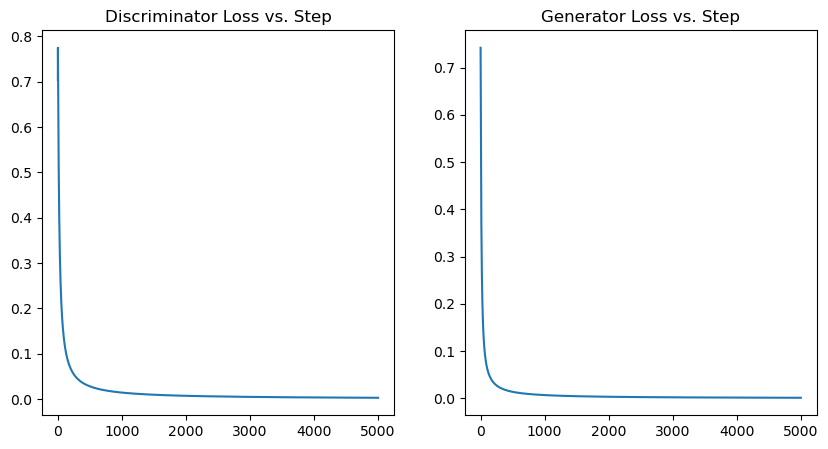

In [20]:
# Load dataset
X = sample_df.drop(['Target_Y'], axis=1)
X = X[chosen_columns]
Y = sample_df['Target_Y']

# Normalize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Convert data to pandas DataFrame
real_data = pd.DataFrame(X, columns=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
                                    '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27',
                                    '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38'])
real_labels = Y

# One hot encode labels
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_labels = one_hot_encoder.fit_transform(np.array(real_labels).reshape(-1, 1))

# Constants
NOISE_DIM = 100
NUM_CLASSES = 2
NUM_FEATURES = 38
BATCH_SIZE = 64
TRAINING_STEPS = 5000

# Generator
def create_generator():
    noise_input = Input(shape=(NOISE_DIM,))
    class_input = Input(shape=(NUM_CLASSES,))
    merged_input = Concatenate()([noise_input, class_input])
    hidden = Dense(128, activation='relu')(merged_input)
    output = Dense(NUM_FEATURES, activation='linear')(hidden)
    model = Model(inputs=[noise_input, class_input], outputs=output)
    return model

# Discriminator
def create_discriminator():
    data_input = Input(shape=(NUM_FEATURES,))
    class_input = Input(shape=(NUM_CLASSES,))
    merged_input = Concatenate()([data_input, class_input])
    hidden = Dense(128, activation='relu')(merged_input)
    output = Dense(1, activation='sigmoid')(hidden)
    model = Model(inputs=[data_input, class_input], outputs=output)
    return model

# cGAN
def create_cgan(generator, discriminator):
    noise_input = Input(shape=(NOISE_DIM,))
    class_input = Input(shape=(NUM_CLASSES,))
    generated_data = generator([noise_input, class_input])
    validity = discriminator([generated_data, class_input])
    model = Model(inputs=[noise_input, class_input], outputs=validity)
    return model

# Create and compile the Discriminator
discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam())

# Create the Generator
generator = create_generator()

# Create the GAN
gan = create_cgan(generator, discriminator)

# Ensure that only the generator is trained
discriminator.trainable = False

gan.compile(loss='binary_crossentropy', optimizer=Adam())


discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam())

# Create the Generator
generator = create_generator()

# Train GAN
step_list = []
loss_list_discriminator = []
loss_list_generator = []
for step in range(TRAINING_STEPS):
    # Select a random batch of real data with labels
    idx = np.random.randint(0, real_data.shape[0], BATCH_SIZE)
    real_batch = real_data.iloc[idx].values
    labels_batch = one_hot_labels[idx]

    # Generate a batch of new data
    noise = np.random.normal(0, 1, (BATCH_SIZE, NOISE_DIM))
    generated_batch = generator.predict([noise, labels_batch])

    # Train the discriminator
    real_loss = discriminator.train_on_batch([real_batch, labels_batch], np.ones((BATCH_SIZE, 1)))
    fake_loss = discriminator.train_on_batch([generated_batch, labels_batch], np.zeros((BATCH_SIZE, 1)))
    discriminator_loss = 0.5 * np.add(real_loss, fake_loss)

    # Train the generator
    generator_loss = gan.train_on_batch([noise, labels_batch], np.ones((BATCH_SIZE, 1)))

    if step % 50 == 0:
        print(f"Step: {step}, Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}")
    
    step_list.append(step)
    loss_list_discriminator.append(discriminator_loss)
    loss_list_generator.append(generator_loss)

# Generate instances for a given class
def generate_data(generator, data_class, num_instances):
    one_hot_class = one_hot_encoder.transform(np.array([[data_class]]))
    noise = np.random.normal(0, 1, (num_instances, NOISE_DIM))
    generated_data = generator.predict([noise, np.repeat(one_hot_class, num_instances, axis=0)])
    return pd.DataFrame(generated_data, columns=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
                                    '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27',
                                    '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38'])

# Generate 48898 instances of class 1
generated_data = generate_data(generator, 1, 48898)
print(generated_data)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(step_list, loss_list_discriminator)
plt.title('Discriminator Loss vs. Step')
    
plt.subplot(1,2,2)
plt.plot(step_list, loss_list_generator)
plt.title('Generator Loss vs. Step')

In [21]:
generated_data.head()

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
0,0.289710,0.585707,-0.513394,0.733109,0.046937,0.292929,0.354206,-0.197160,0.473988,-0.193822,...,0.445199,0.224903,0.068998,-1.159027,-0.318919,0.454003,-0.935743,-0.366319,0.757991,0.307677
1,0.828099,0.587764,0.580559,-0.327636,-0.708574,0.678035,-0.526864,-1.367421,0.959899,-0.018339,...,-1.066614,0.562090,1.504796,0.827776,-0.279543,-0.294538,-0.539533,-0.915957,-0.946905,-0.797539
2,0.787813,0.865004,2.014528,-0.615867,-0.785806,-0.129859,-0.219510,-1.400671,-0.535942,1.032314,...,-0.389550,-0.570188,-0.623905,-1.666745,-0.162533,0.086020,-0.816357,-0.717800,0.479056,-0.389862
3,-0.388029,0.368226,-0.295151,-1.067708,0.422717,0.081435,-0.034664,-1.046324,0.704947,-0.237470,...,-0.317757,-0.817457,0.989702,-0.336548,0.997643,0.458333,-0.613767,1.191695,-0.539647,0.126547
4,-0.293072,1.577885,0.632395,-0.733165,-0.084101,0.586124,-0.169791,-1.580322,0.364747,-0.277559,...,-1.114044,0.046200,1.795645,0.350587,-0.371464,-0.581231,-1.667219,-1.302131,-0.035905,-0.136935


In [22]:
X_selected.head()

,X5,X28,X23,X27_windows,X22,X19,X2,X1,X8_AC,X18_BC,...,X25_TELEAPP,X15_CD,X15_CF,X20,X6,X4,X13,X15_CE,X18_BG,X27_x11
434757,40,0,1500,1.0,0,1,0.305352,0.1,0.0,0.0,...,0.0,0.0,0.0,1,0.019318,116,7,0.0,0.0,0.0
334757,20,1,200,0.0,0,0,0.998933,0.2,1.0,1.0,...,0.0,0.0,0.0,1,17.990344,5,1,0.0,0.0,0.0
895206,40,1,200,0.0,0,0,0.249452,0.6,0.0,1.0,...,0.0,0.0,0.0,1,0.010178,16,16,0.0,0.0,0.0
723405,40,1,200,0.0,0,1,0.142540,0.3,0.0,0.0,...,0.0,0.0,0.0,1,0.007960,118,28,0.0,0.0,0.0
133474,40,1,200,0.0,0,0,0.397762,0.4,0.0,1.0,...,0.0,0.0,0.0,1,0.008105,75,29,0.0,0.0,0.0


In [24]:
len(X_selected.columns)

38

In [26]:
columns = list(X_selected.columns)
synthetic_columns = list(generated_data.columns)

column_map = {}
for i in range(len(columns)):
    column_map[synthetic_columns[i]] = columns[i]

column_map

{'1': 'X5',
 '2': 'X28',
 '3': 'X23',
 '4': 'X27_windows',
 '5': 'X22',
 '6': 'X19',
 '7': 'X2',
 '8': 'X1',
 '9': 'X8_AC',
 '10': 'X18_BC',
 '11': 'X18_BB',
 '12': 'X18_BE',
 '13': 'X18_BD',
 '14': 'X29',
 '15': 'X17',
 '16': 'X3',
 '17': 'X16',
 '18': 'X15_CB',
 '19': 'X21',
 '20': 'X24',
 '21': 'X14',
 '22': 'X7',
 '23': 'X9',
 '24': 'X27_macintosh',
 '25': 'X15_CC',
 '26': 'X18_BF',
 '27': 'X27_other',
 '28': 'X31',
 '29': 'X25_TELEAPP',
 '30': 'X15_CD',
 '31': 'X15_CF',
 '32': 'X20',
 '33': 'X6',
 '34': 'X4',
 '35': 'X13',
 '36': 'X15_CE',
 '37': 'X18_BG',
 '38': 'X27_x11'}

In [27]:
generated_data.rename(columns=column_map, inplace=True)
generated_data.head()

,X5,X28,X23,X27_windows,X22,X19,X2,X1,X8_AC,X18_BC,...,X25_TELEAPP,X15_CD,X15_CF,X20,X6,X4,X13,X15_CE,X18_BG,X27_x11
0,0.289710,0.585707,-0.513394,0.733109,0.046937,0.292929,0.354206,-0.197160,0.473988,-0.193822,...,0.445199,0.224903,0.068998,-1.159027,-0.318919,0.454003,-0.935743,-0.366319,0.757991,0.307677
1,0.828099,0.587764,0.580559,-0.327636,-0.708574,0.678035,-0.526864,-1.367421,0.959899,-0.018339,...,-1.066614,0.562090,1.504796,0.827776,-0.279543,-0.294538,-0.539533,-0.915957,-0.946905,-0.797539
2,0.787813,0.865004,2.014528,-0.615867,-0.785806,-0.129859,-0.219510,-1.400671,-0.535942,1.032314,...,-0.389550,-0.570188,-0.623905,-1.666745,-0.162533,0.086020,-0.816357,-0.717800,0.479056,-0.389862
3,-0.388029,0.368226,-0.295151,-1.067708,0.422717,0.081435,-0.034664,-1.046324,0.704947,-0.237470,...,-0.317757,-0.817457,0.989702,-0.336548,0.997643,0.458333,-0.613767,1.191695,-0.539647,0.126547
4,-0.293072,1.577885,0.632395,-0.733165,-0.084101,0.586124,-0.169791,-1.580322,0.364747,-0.277559,...,-1.114044,0.046200,1.795645,0.350587,-0.371464,-0.581231,-1.667219,-1.302131,-0.035905,-0.136935


In [28]:
new_df = pd.concat([X_selected, generated_data], axis=0)
new_df.shape

(98898, 38)

In [29]:
synthetic_target = [1 for i in range(generated_data.shape[0])]

In [32]:
generated_y = {'Target_Y': synthetic_target}

generated_y = pd.DataFrame(generated_y)

In [37]:
new_y = pd.concat([y, generated_y], axis=0)
new_y.head()

,Target_Y
434757,0
334757,0
895206,0
723405,0
133474,0


In [38]:
total_data = pd.concat([new_df, new_y], axis=1)
total_data.shape

(98898, 39)

In [39]:
total_data['Target_Y'].value_counts()

Target_Y
0    49449
1    49449
Name: count, dtype: int64

In [40]:
X = total_data.drop(columns=['Target_Y'])
y = total_data['Target_Y']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=69, stratify=y)


In [41]:
model = Sequential()
model.add(Dense(19, activation='sigmoid', input_shape=(X_train.shape[1],)))  # Matches feature count
model.add(Dense(1, activation='sigmoid'))  # No need for input_shape

# Compile model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using resampled training data
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

c:\Users\trush\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9591 - loss: 0.2264
Epoch 2/100
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9947 - loss: 0.0332
Epoch 3/100
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9950 - loss: 0.0291
Epoch 4/100
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9945 - loss: 0.0307
Epoch 5/100
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9946 - loss: 0.0303
Epoch 6/100
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9950 - loss: 0.0281
Epoch 7/100
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9950 - loss: 0.0283
Epoch 8/100
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9948 - loss: 0.0292
Epoch 9/100
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9946 - loss: 0.0298
Epoch 10/100
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9947 - loss: 0.0295
Epoch 11/100
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9942 - loss: 0.0315
Epoch 12/100
1082/

In [42]:
y_pred_probs_train = model.predict(X_train)
y_pred_train = (y_pred_probs_train > 0.5).astype(int)

y_pred_probs_test = model.predict(X_test)
y_pred_test = (y_pred_probs_test > 0.5).astype(int)

2164/2164 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step
928/928 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


In [43]:
print('---Train---')
metrics(y_train, y_pred_train)

print('---Test---')
metrics(y_test, y_pred_test)

---Train---
Accuracy: 0.9945397815912637
Precision: 1.0
Recall: 0.9890795631825273
F1 Score: 0.9945098039215686
ROC AUC: 0.9945397815912637
---Test---
Accuracy: 0.9941691944725312
Precision: 1.0
Recall: 0.9883383889450623
F1 Score: 0.9941349967793335
ROC AUC: 0.9941691944725312


In [44]:
print(confusion_matrix(y_test, y_pred_test))

[[14835     0]
 [  173 14662]]
